<a href="https://colab.research.google.com/github/samehaisaa/ML-Journey/blob/main/SPD_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geomstats


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 37.8 MB/s eta 0:00:00


In [ ]:
import geomstats.backend as gs
from geomstats.geometry.spd_matrices import SPDMatrices

# Define the dimension of SPD matrices (e.g., 3x3)
dim = 2
spd_manifold = SPDMatrices(n=dim)

# Generate random SPD matrices
n_matrices = 3
random_spds = spd_manifold.random_point(n_matrices)

print("Random SPD matrices:")
print(random_spds)


Random SPD matrices:
[[[ 1.24120486 -0.52811582]
  [-0.52811582  0.622038  ]]

 [[ 1.54210477  0.03368138]
  [ 0.03368138  0.48700161]]

 [[ 2.37526386  0.01093831]
  [ 0.01093831  0.47255478]]]


In [ ]:
import geomstats.geometry.spd_matrices as spd
print(dir(spd))


['CholeskyMap', 'ComplexMatrices', 'Diffeo', 'GeneralLinear', 'InvariantPositiveLowerTriangularMatricesMetric', 'LieCholeskyMetric', 'Matrices', 'MatricesMetric', 'MatrixPower', 'PositiveLowerTriangularMatrices', 'PullbackDiffeoMetric', 'RiemannianMetric', 'SPDAffineMetric', 'SPDBuresWassersteinMetric', 'SPDEuclideanMetric', 'SPDLogEuclideanMetric', 'SPDMatrices', 'SPDPowerMetric', 'ScalarProductMetric', 'SymMatrixLog', 'SymmetricMatrices', 'VectorSpaceOpenSet', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_aux_differential_power', 'apply_func_to_eigvalsh', 'expmh', 'gs', 'integrate', 'logmh', 'math', 'powermh', 'repeat_out']


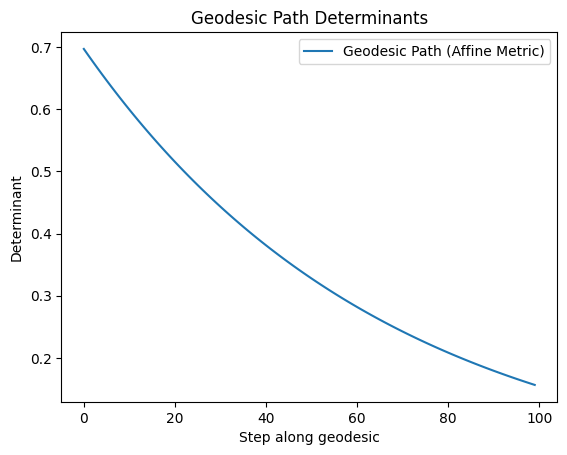

In [ ]:
from geomstats.geometry.spd_matrices import SPDMatrices, SPDAffineMetric

# Define the SPD space
spd_space = SPDMatrices(n=dim)

# Define the affine-invariant metric
metric = SPDAffineMetric(spd_space)

# Choose two random SPD matrices
spd_a, spd_b = random_spds[0], random_spds[1]

# Compute geodesic between the two matrices
n_points = 100
geodesic = metric.geodesic(initial_point=spd_a, end_point=spd_b)
geodesic_points = geodesic(gs.linspace(0, 1, n_points))

# Visualize geodesic points (trace their determinant)
determinants = [gs.linalg.det(matrix) for matrix in geodesic_points]
plt.plot(determinants, label="Geodesic Path (Affine Metric)")
plt.title("Geodesic Path Determinants")
plt.xlabel("Step along geodesic")
plt.ylabel("Determinant")
plt.legend()
plt.show()


In [ ]:
for spd in random_spds:
    det = np.linalg.det(spd)
    cond = np.linalg.cond(spd)
    print(f"Determinant: {det}, Condition number: {cond}")


Determinant: 2.931983889283256, Condition number: 19.151082737057887
Determinant: 0.308492610922293, Condition number: 7.021048528363019
Determinant: 0.44526923822241227, Condition number: 26.648846582316686
Determinant: 0.07826850240946773, Condition number: 3.488110313421803
Determinant: 0.4698636135780271, Condition number: 14.47895739885662
Determinant: 0.39800028682915883, Condition number: 4.728585045479721
Determinant: 1.1602468130171726, Condition number: 38.262039729082424
Determinant: 0.6994831146974647, Condition number: 41.90986303852337
Determinant: 0.9383150244438022, Condition number: 38.501045508495935
Determinant: 0.7080757245490975, Condition number: 17.162751672795746


In [ ]:
regularization_factor = 1e-6  # small value for regularization
spd = spd + regularization_factor * np.eye(dim)


In [ ]:
import numpy as np
from geomstats.geometry.spd_matrices import SPDMatrices, SPDAffineMetric
from geomstats.learning.pca import TangentPCA

# Step 0: Generate synthetic fMRI covariance matrices (for illustration)
n_subjects = 100
n_regions = 100
spd_manifold = SPDMatrices(n=n_regions)
data = spd_manifold.random_point(n_samples=n_subjects)  # Replace with real data

# Step 1: Compute Fréchet Mean (Karcher flow)
# Pass the SPDMatrices object (spd_manifold) instead of n_regions
metric = SPDAffineMetric(spd_manifold)
mean = metric.mean(data, max_iter=100, epsilon=1e-6)

# Step 2: Map to tangent space at mean
tangent_vectors = metric.log(data, mean)

# Step 3: Apply Tangent PCA
tpca = TangentPCA(metric=metric, n_components=10)
tpca.fit(data, base_point=mean)
reduced_tangent_vectors = tpca.transform(data)

# Step 4: Reconstruct reduced SPD matrices (optional)
reconstructed_data = tpca.inverse_transform(reduced_tangent_vectors)

AttributeError: 'SPDAffineMetric' object has no attribute 'mean'

In [ ]:
import numpy as np
from geomstats.geometry.spd_matrices import SPDMatrices, SPDAffineMetric
from geomstats.learning.pca import TangentPCA

# Step 0: Generate synthetic fMRI covariance matrices (for illustration)
n_subjects = 100
n_regions = 100
spd_manifold = SPDMatrices(n=n_regions)
data = spd_manifold.random_point(n_samples=n_subjects)  # Replace with real data

# Step 1: Compute Fréchet Mean (Karcher flow)
# Use the spd_manifold object (SPDMatrices) to compute the mean
metric = SPDAffineMetric(spd_manifold)
mean = spd_manifold.mean(data, metric=metric, max_iter=100, epsilon=1e-6) # Corrected line

# Step 2: Map to tangent space at mean
tangent_vectors = metric.log(data, mean)

# Step 3: Apply Tangent PCA
tpca = TangentPCA(metric=metric, n_components=10)
tpca.fit(data, base_point=mean)
reduced_tangent_vectors = tpca.transform(data)

# Step 4: Reconstruct reduced SPD matrices (optional)
reconstructed_data = tpca.inverse_transform(reduced_tangent_vectors)

ImportError: cannot import name 'mean' from 'geomstats.geometry.spd_matrices' (/usr/local/lib/python3.11/dist-packages/geomstats/geometry/spd_matrices.py)

In [ ]:
import numpy as np
from scipy.linalg import cholesky

# Function to generate SPD matrices
def generate_spd_matrix(dim):
    A = np.random.rand(dim, dim)
    spd_matrix = np.dot(A, A.T) + np.eye(dim)  # Ensures positive definiteness
    return spd_matrix

# Generate a few SPD matrices (3x3)
num_matrices = 5
dim = 2
spd_matrices = [generate_spd_matrix(dim) for _ in range(num_matrices)]


In [ ]:
# Flatten the SPD matrices into vectors
flattened_spd_matrices = [matrix.flatten() for matrix in spd_matrices]
flattened_spd_matrices = np.array(flattened_spd_matrices)

# Perform classical PCA using sklearn
from sklearn.decomposition import PCA

# Initialize PCA and reduce to 2 dimensions
pca = PCA(n_components=1)
pca_result = pca.fit_transform(flattened_spd_matrices)

print("PCA components (flattened SPD matrices):")
print(pca.components_)
print("Transformed data (PCA projection):")
print(pca_result)


PCA components (flattened SPD matrices):
[[-0.12657405  0.29860963  0.29860963  0.89757651]]
Transformed data (PCA projection):
[[ 0.1584568 ]
 [-0.60576755]
 [ 0.6282909 ]
 [-0.00263941]
 [-0.17834074]]


In [ ]:
from sklearn.decomposition import PCA
from scipy.linalg import logm, expm

# Log-Euclidean PCA method
def log_euclidean_pca(matrices, n_components=2):
    # Take the logarithm of each SPD matrix
    log_matrices = [logm(matrix) for matrix in matrices]

    # Flatten the log-transformed matrices
    log_matrices_flat = np.array([matrix.flatten() for matrix in log_matrices])

    # Apply classical PCA to the flattened log-matrices
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(log_matrices_flat)

    # Reconstruct the SPD matrices by exponentiating the PCA results
    # Expanding the PCA results back to the manifold
    reconstructed_matrices = [expm(pca.components_.dot(comp)) for comp in pca_result.T]

    return pca_result, reconstructed_matrices

# Apply Log-Euclidean PCA to the SPD matrices
pca_result_log_euclidean, reconstructed_matrices = log_euclidean_pca(spd_matrices, n_components=2)

print("Log-Euclidean PCA transformed data:")
print(pca_result_log_euclidean)


ValueError: shapes (2,9) and (5,) not aligned: 9 (dim 1) != 5 (dim 0)

In [ ]:
print(flattened_spd_matrices)

[[2.04170252 0.6915326  0.74128429 0.6915326  1.74924405 0.67555631
  0.74128429 0.67555631 1.67824467]
 [2.14167259 0.87288636 0.68281414 0.87288636 1.83120648 0.78471749
  0.68281414 0.78471749 1.88086273]
 [1.81542744 0.32801785 0.46816054 0.32801785 1.77425141 0.76715718
  0.46816054 0.76715718 2.06198379]
 [2.76564549 1.73804421 0.2363025  1.73804421 2.75830156 0.22234708
  0.2363025  0.22234708 1.03384617]
 [1.44913048 0.14491611 0.44161773 0.14491611 1.60749951 0.46473873
  0.44161773 0.46473873 1.66221947]
 [1.43745894 0.57486087 0.64426778 0.57486087 1.99496099 0.9261419
  0.64426778 0.9261419  2.22103653]
 [1.91011973 0.72106771 0.60873393 0.72106771 2.19354004 0.45015888
  0.60873393 0.45015888 1.62220544]
 [2.11718243 1.4160525  0.70622399 1.4160525  3.08690576 1.07296314
  0.70622399 1.07296314 1.56276281]
 [2.04544813 0.18680248 0.34223618 0.18680248 1.53692058 0.43895334
  0.34223618 0.43895334 1.97462731]
 [1.1154243  0.28883428 0.30286296 0.28883428 2.00288888 1.135464

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the Autoencoder
class SPD_Autoencoder(nn.Module):
    def __init__(self, input_dim=9, latent_dim=2):
        super(SPD_Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 8),
            nn.ReLU(),
            nn.Linear(8, 6),
            nn.ReLU(),
            nn.Linear(6, 4),
            nn.ReLU(),
            nn.Linear(4, latent_dim),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 4),
            nn.ReLU(),
            nn.Linear(4, 6),
            nn.ReLU(),
            nn.Linear(6, 8),
            nn.ReLU(),
            nn.Linear(8, input_dim),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Generate synthetic SPD matrices (3x3)
def generate_spd_matrices(n_samples):
    matrices = []
    for _ in range(n_samples):
        A = np.random.randn(3, 3)
        Y = A @ A.T  # Ensure positive definiteness
        matrices.append(Y.flatten())  # Flatten to 9D vector
    return np.array(matrices)

# Prepare data
n_samples = 10000
data = generate_spd_matrices(n_samples)
data = torch.tensor(data, dtype=torch.float32)

# Initialize model, loss, and optimizer
model = SPD_Autoencoder(input_dim=9, latent_dim=2)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 100
batch_size = 32
for epoch in range(epochs):
    for i in range(0, n_samples, batch_size):
        # Get batch
        batch = data[i:i+batch_size]

        # Forward pass
        reconstructed = model(batch)
        loss = criterion(reconstructed, batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Use the encoder for dimensionality reduction
encoded_data = model.encoder(data).detach().numpy()
print("Encoded Data Shape:", encoded_data.shape)

Epoch [1/100], Loss: 2.8768
Epoch [2/100], Loss: 2.8755
Epoch [3/100], Loss: 2.8745
Epoch [4/100], Loss: 2.8720
Epoch [5/100], Loss: 2.8676
Epoch [6/100], Loss: 2.8621
Epoch [7/100], Loss: 2.8566
Epoch [8/100], Loss: 2.8515
Epoch [9/100], Loss: 2.8470
Epoch [10/100], Loss: 2.8431
Epoch [11/100], Loss: 2.8397
Epoch [12/100], Loss: 2.8369
Epoch [13/100], Loss: 2.8345
Epoch [14/100], Loss: 2.8323
Epoch [15/100], Loss: 2.8303
Epoch [16/100], Loss: 2.8285
Epoch [17/100], Loss: 2.8269
Epoch [18/100], Loss: 2.8254
Epoch [19/100], Loss: 2.8240
Epoch [20/100], Loss: 2.8227
Epoch [21/100], Loss: 2.8216
Epoch [22/100], Loss: 2.8205
Epoch [23/100], Loss: 2.8196
Epoch [24/100], Loss: 2.8187
Epoch [25/100], Loss: 2.8180
Epoch [26/100], Loss: 2.8173
Epoch [27/100], Loss: 2.8166
Epoch [28/100], Loss: 2.8160
Epoch [29/100], Loss: 2.8153
Epoch [30/100], Loss: 2.8146
Epoch [31/100], Loss: 2.8140
Epoch [32/100], Loss: 2.8133
Epoch [33/100], Loss: 2.8126
Epoch [34/100], Loss: 2.8120
Epoch [35/100], Loss: 2

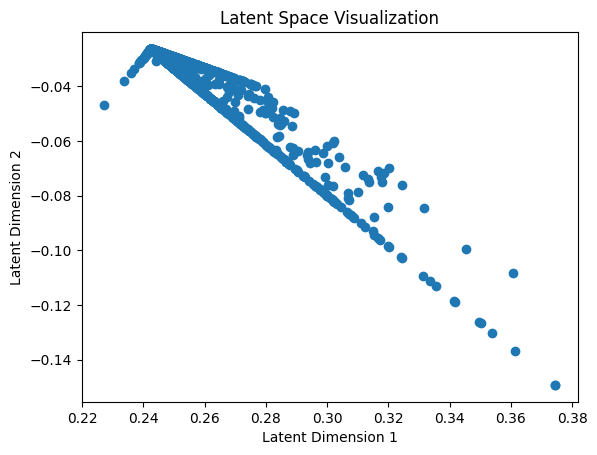

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(latent_vectors[:, 0], latent_vectors[:, 1])
plt.title("Latent Space Visualization")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.show()

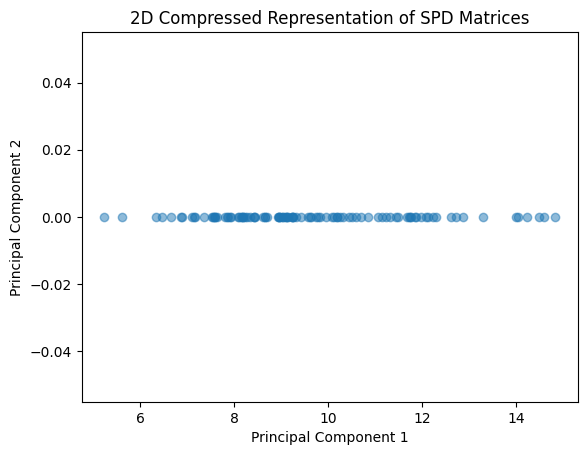

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.title('2D Compressed Representation of SPD Matrices')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
print(reduced_data)

[[ 8.961401   0.       ]
 [ 9.559931   0.       ]
 [ 8.440672   0.       ]
 [ 9.313348   0.       ]
 [ 6.8754888  0.       ]
 [ 9.2509775  0.       ]
 [ 8.665934   0.       ]
 [11.313287   0.       ]
 [ 7.5258684  0.       ]
 [ 8.431144   0.       ]
 [10.697907   0.       ]
 [ 8.173254   0.       ]
 [10.176302   0.       ]
 [10.089447   0.       ]
 [ 7.942744   0.       ]
 [ 8.948991   0.       ]
 [14.0423565  0.       ]
 [11.743284   0.       ]
 [14.214156   0.       ]
 [ 9.110942   0.       ]
 [ 9.046565   0.       ]
 [ 7.9162283  0.       ]
 [ 8.095714   0.       ]
 [10.515949   0.       ]
 [12.286275   0.       ]
 [ 8.282846   0.       ]
 [ 9.147484   0.       ]
 [10.447127   0.       ]
 [12.077722   0.       ]
 [ 7.6420813  0.       ]
 [11.8447695  0.       ]
 [ 9.946      0.       ]
 [10.133401   0.       ]
 [11.143045   0.       ]
 [ 9.230354   0.       ]
 [ 9.1035595  0.       ]
 [12.85521    0.       ]
 [ 9.045887   0.       ]
 [ 9.219768   0.       ]
 [11.961384   0.       ]


In [ ]:
import geomstats.backend as gs
from geomstats.geometry.spd_matrices import SPDMatrices, SPDAffineMetric

# Define the SPD manifold
n = 3  # Size of SPD matrices (n x n)
spd_manifold = SPDMatrices(n)
spd_metric = SPDAffineMetric(spd_manifold)

In [ ]:
from geomstats.geometry.spd_matrices import SPDMatrices

# Generate random SPD matrices
num_points = 100  # Number of SPD matrices
spd_matrices = spd_manifold.random_point(n_samples=num_points)


In [ ]:
from geomstats.learning.frechet_mean import FrechetMean

frechet_mean = FrechetMean(space=spd_manifold)
frechet_mean.fit(spd_matrices)
mean_spd = frechet_mean.estimate_
print(mean_spd)

[[ 0.9514986   0.02264577  0.03241098]
 [ 0.02264577  1.03942527 -0.01391717]
 [ 0.03241098 -0.01391717  0.92512649]]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


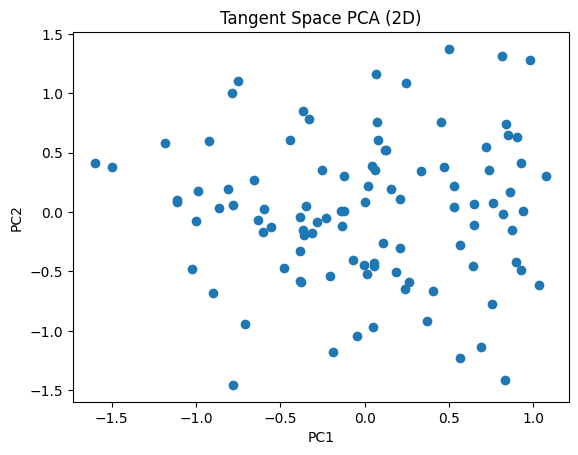

Original SPD matrices:
[[[ 0.52569199  0.34911282  0.30029437]
  [ 0.34911282  0.76062503  0.27231455]
  [ 0.30029437  0.27231455  1.00014173]]

 [[ 2.53380005  0.22299315  0.4587167 ]
  [ 0.22299315  0.48725969  0.02798187]
  [ 0.4587167   0.02798187  0.94262313]]

 [[ 0.632738    0.28183897  0.38270019]
  [ 0.28183897  0.62399945 -0.15766436]
  [ 0.38270019 -0.15766436  2.80136317]]

 [[ 1.11312231  0.25630865  0.37058134]
  [ 0.25630865  1.29976191 -0.47428487]
  [ 0.37058134 -0.47428487  0.90662099]]

 [[ 1.69604447 -0.06147669  0.25428665]
  [-0.06147669  1.16466478  0.71242696]
  [ 0.25428665  0.71242696  2.52746634]]

 [[ 0.46099127  0.27077527  0.0588507 ]
  [ 0.27077527  0.94049964 -0.21283441]
  [ 0.0588507  -0.21283441  0.65312966]]

 [[ 2.00858327 -0.42317558  0.41480373]
  [-0.42317558  1.12404702 -0.09408429]
  [ 0.41480373 -0.09408429  0.53851833]]

 [[ 1.63694369 -0.17894712  0.71767761]
  [-0.17894712  1.06073277 -0.44106171]
  [ 0.71767761 -0.44106171  2.78888516]]

 

In [ ]:
tangent_vectors = spd_metric.log(spd_matrices, mean_spd)
# Flatten tangent vectors and apply PCA
tangent_vectors_flat = tangent_vectors.reshape(num_points, -1)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_tangent_vectors = pca.fit_transform(tangent_vectors_flat)  # Shape: (num_points, 2)

# Reconstruct tangent vectors in the original flattened space
reconstructed_tangent_vectors_flat = pca.inverse_transform(reduced_tangent_vectors)  # Shape: (num_points, n * n)

# Reshape back to (num_points, n, n)
reconstructed_tangent_vectors = reconstructed_tangent_vectors_flat.reshape(num_points, n, n)

# Map back to the SPD manifold
reconstructed_spd_matrices = spd_metric.exp(reconstructed_tangent_vectors, mean_spd)

# Visualize the results
plt.scatter(reduced_tangent_vectors[:, 0], reduced_tangent_vectors[:, 1])
plt.title("Tangent Space PCA (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Compare original and reconstructed SPD matrices
print("Original SPD matrices:")
print(spd_matrices)
print("Reconstructed SPD matrices:")
print(reconstructed_spd_matrices)


In [43]:
def extract_upper_triangular(matrix):
    """Extract the upper triangular part of a symmetric matrix (including the diagonal)."""
    indices = np.triu_indices(matrix.shape[0])
    return matrix[indices]


In [46]:
import numpy as np
from geomstats.geometry.spd_matrices import SPDMatrices
from geomstats.learning.frechet_mean import FrechetMean
from sklearn.decomposition import PCA

# Step 0: Setup and create SPD matrix data
def generate_spd_matrices(n, dim):
    """Generate n random SPD matrices of dimension dim."""
    spd_matrices = []
    for _ in range(n):
        A = np.random.randn(dim, dim)
        spd = A @ A.T + dim * np.eye(dim)  # Ensure positive definiteness
        spd_matrices.append(spd)
    return np.array(spd_matrices)

# Generate 10 SPD matrices of size 3x3
n_samples = 1000
dim = 3
spd_matrices = generate_spd_matrices(n_samples, dim)
print("Generated SPD Matrices:")
print(spd_matrices)

# Step 1: Compute the Frechet mean
print("\nStep 1: Compute the Frechet Mean")
spd_space = SPDMatrices(dim)
# Pass spd_space to the space argument
frechet_mean_estimator = FrechetMean(space=spd_space)
frechet_mean = frechet_mean_estimator.fit(spd_matrices).estimate_
print("Frechet Mean (\u03BC):\n", frechet_mean)

# Step 2: Map to the tangent space
def map_to_tangent_space(spd_matrices, mean, metric):
    """Map SPD matrices to the tangent space at the Frechet mean."""
    tangent_vectors = [metric.log(matrix, mean) for matrix in spd_matrices]
    return np.array(tangent_vectors)

print("\nStep 2: Map to Tangent Space")
tangent_vectors = map_to_tangent_space(spd_matrices, frechet_mean, spd_space.metric)
print("Tangent Vectors:\n", tangent_vectors)

# Step 3: Apply PCA on the tangent vectors
print("\nStep 3: Apply PCA")
pca = PCA(n_components=3)  # Reduce dimensionality to 2
reduced_tangent_vectors = pca.fit_transform(tangent_vectors.reshape(n_samples, -1))
print("Reduced Tangent Vectors:\n", reduced_tangent_vectors)

# Step 4: Map back to the manifold
def map_back_to_manifold(reduced_vectors, mean, metric, pca):
    """Map reduced tangent vectors back to the SPD manifold."""
    reduced_matrices = []
    for vector in reduced_vectors:
        # Reconstruct in flattened tangent space using PCA's inverse_transform
        tangent_vector_flat = pca.inverse_transform([vector])
        # Reshape to original tangent vector shape (dim, dim)
        tangent_vector = tangent_vector_flat.reshape(dim, dim)
        spd_matrix = metric.exp(tangent_vector, mean)
        reduced_matrices.append(spd_matrix)
    return np.array(reduced_matrices)

print("\nStep 4: Map Back to the Manifold")
# Pass the PCA object to map_back_to_manifold
reconstructed_matrices = map_back_to_manifold(reduced_tangent_vectors, frechet_mean, spd_space.metric, pca)
print("Reconstructed SPD Matrices:\n", reconstructed_matrices)

# Final Results
print("\nSummary:")
print("Original SPD Matrices:\n", spd_matrices)
print("Reconstructed SPD Matrices:\n", reconstructed_matrices)

Generated SPD Matrices:
[[[ 4.29450035 -0.6504716   0.25957141]
  [-0.6504716   4.49395696  0.19249646]
  [ 0.25957141  0.19249646  3.14488785]]

 [[ 6.56013952  1.45029101  0.6593726 ]
  [ 1.45029101  4.2322167  -0.84197801]
  [ 0.6593726  -0.84197801  6.46810597]]

 [[ 5.99939478  2.23867854 -0.41463151]
  [ 2.23867854  4.78015929 -0.36482855]
  [-0.41463151 -0.36482855  3.26002483]]

 ...

 [[ 5.27619352 -0.16313252  0.987466  ]
  [-0.16313252  4.31893309 -0.15593941]
  [ 0.987466   -0.15593941  4.04193995]]

 [[ 4.16418606 -0.46369188  2.2482316 ]
  [-0.46369188  3.36367264 -0.58344221]
  [ 2.2482316  -0.58344221  7.8865683 ]]

 [[13.45889202 -1.85866441 -1.45568972]
  [-1.85866441  5.07967693 -0.18069367]
  [-1.45568972 -0.18069367  3.55005052]]]

Step 1: Compute the Frechet Mean
Frechet Mean (μ):
 [[ 5.19045758  0.07588536 -0.01752203]
 [ 0.07588536  5.22379923  0.08190252]
 [-0.01752203  0.08190252  5.24675084]]

Step 2: Map to Tangent Space
Tangent Vectors:
 [[[-1.06928743 -0.8

In [39]:
def geodesic_distance(matrix1, matrix2, metric):
    """Compute the geodesic distance between two SPD matrices."""
    return metric.dist(matrix1, matrix2)

# Measure geodesic distances
distances = [
    geodesic_distance(spd_matrices[i], reconstructed_matrices[i], spd_space.  metric)
    for i in range(n_samples)
]
mean_distance = np.mean(distances)
print(f"Average Geodesic Distance: {mean_distance}")


Average Geodesic Distance: 0.2507260470504586


In [19]:
def eigenvalue_difference(matrix1, matrix2):
    """Compute the difference between eigenvalues of two matrices."""
    eig1 = np.linalg.eigvalsh(matrix1)  # Eigenvalues of matrix1
    eig2 = np.linalg.eigvalsh(matrix2)  # Eigenvalues of matrix2
    return np.linalg.norm(eig1 - eig2)

# Measure eigenvalue differences
eigenvalue_diffs = [
    eigenvalue_difference(spd_matrices[i], reconstructed_matrices[i])
    for i in range(n_samples)
]
mean_eigenvalue_diff = np.mean(eigenvalue_diffs)
print(f"Average Eigenvalue Difference: {mean_eigenvalue_diff}")


Average Eigenvalue Difference: 12.075327097677691
